In [2]:

#1 CHECK THE DATA TYPES OF THE COLUMNS. GET THE NUMERIC DATA INTO DATAFRAME CALLED NUMERICAL AND CATEGORICAL COLUMNS IN A DATAFRAME CALLED CATEGORICALS.



In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

customer = pd.read_csv(r'C:\Users\david\OneDrive\Ambiente de Trabalho\Iron Hack\ficheiros para LAB PANDA 2\marketing_customer_analysis.csv')
customer

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
cols = []
for i in range(len(customer.columns)):
    cols.append(customer.columns[i].lower().replace(' ','_'))
customer.columns = cols




In [5]:
customer.dtypes 

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

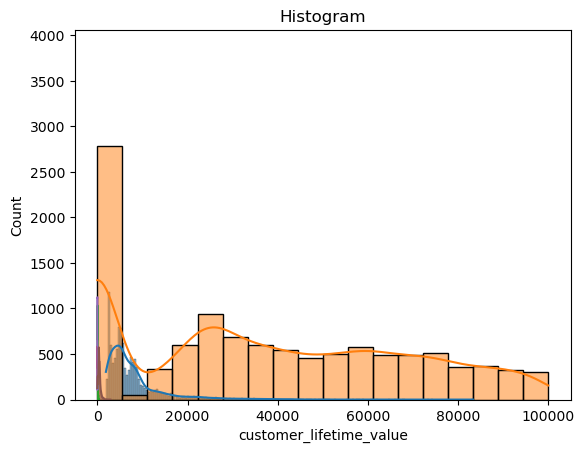

In [6]:
# Now we will try to check the normality of the numerical variables visually



sns.histplot(customer['customer_lifetime_value'], kde=True)
sns.histplot(customer['income'], kde=True)
sns.histplot(customer['monthly_premium_auto'], kde=True)
sns.histplot(customer['months_since_last_claim'], kde=True)
sns.histplot(customer['number_of_policies'], kde=True)
sns.histplot(customer['total_claim_amount'], kde=True)


plt.title('Histogram')
plt.show()




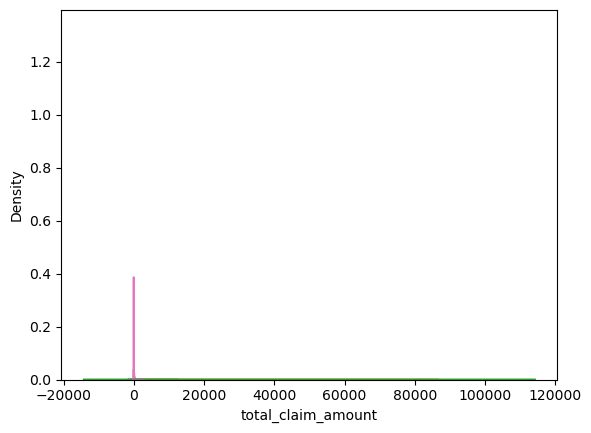

In [7]:
# USE SEABORN LIBRARY TO CONSTRUCT DISTRIBUTION PLOTS FOR THE NUMERICAL VARIABLES
# USE MATPLOTLIB TO CONSTRUCT HISTOGRAMS
# DO THE DISTRIBUTIONS FOR DIFFERENT NUMERICAL VARIABLES LOOKS LIKE A NORMAL DISTRIBUTION

import seaborn as sns

sns.distplot(customer['unnamed:_0'])
sns.distplot(customer['customer_lifetime_value'])
sns.distplot(customer['income'])
sns.distplot(customer['monthly_premium_auto'])
sns.distplot(customer['months_since_last_claim'])
sns.distplot(customer['months_since_policy_inception'])
sns.distplot(customer['number_of_policies'])
sns.distplot(customer['total_claim_amount'])


plt.show()


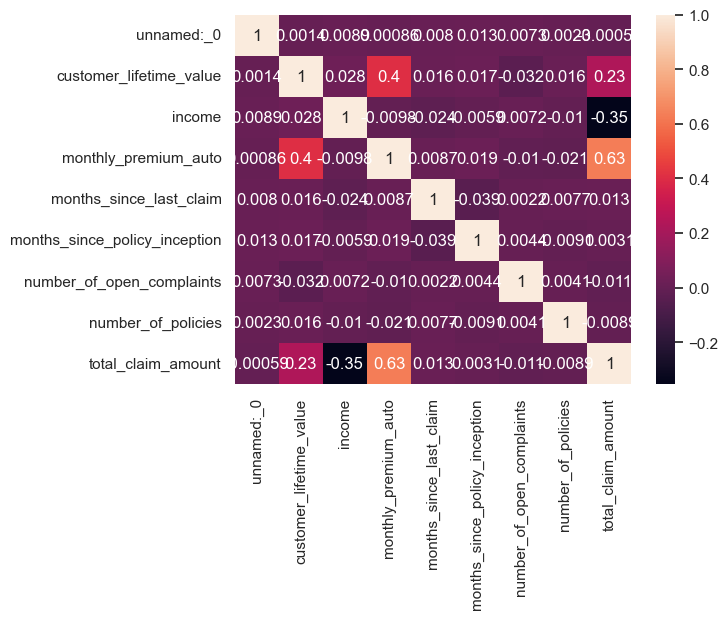

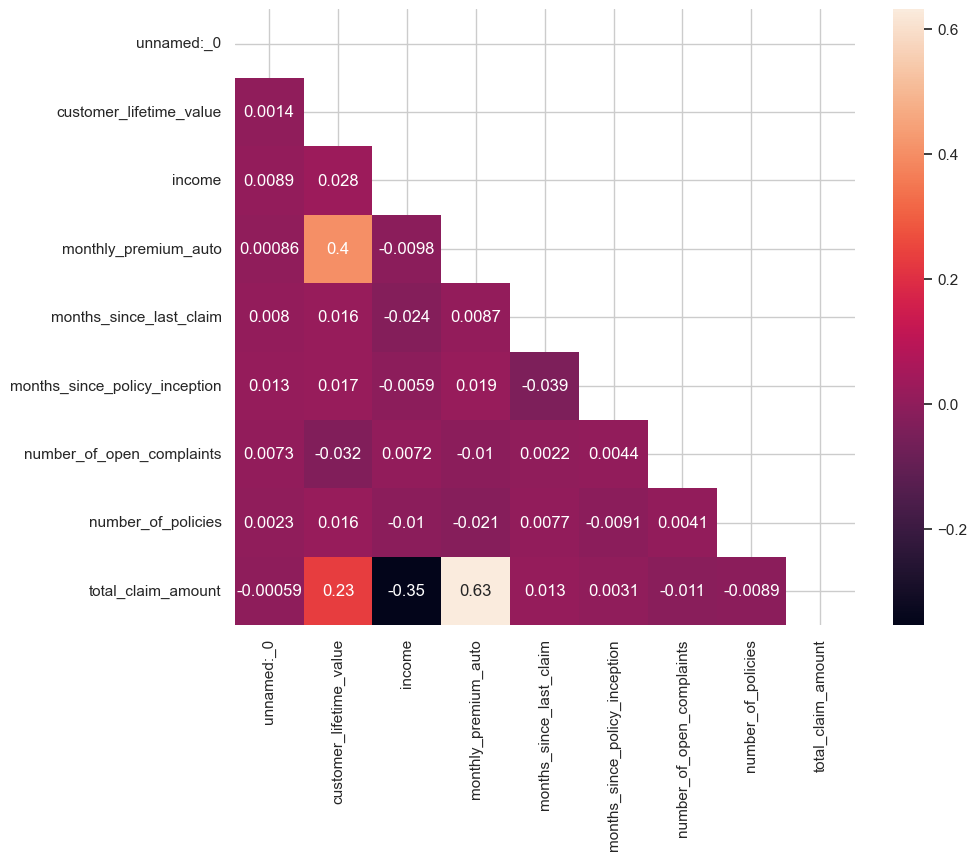

In [18]:
# For the numerical variables, check the multicollinearity between the features.
# Please note that we will use the column total_claim_amount later as the target variable.

# DROP ONE OF THE TWO FEATURES THAT SHOW A HIGH CORRELATION BETWEEN THEM ( GREATER THAN 0.9).
# WRITE CODE FOR BOTH THE CORRELATION MATRIX AND FOR SEABORN HEATMAP.
# IF THERE IS NO PAIR OF FEAUTURES THAT HAVE A HIGH CORRELATION, THEN DO NOT DROP ANY FEATURES.


sns.set(style="whitegrid")



correlations_matrix = customer.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True # don't include if you think it will confuse the students right now
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()




# NOTE: NOT GONNA DROP ANNY FEATURES BECAUSE THERE IS NONE GREATER THAN 0.9.